 # Boston House Prices Analysis
 ![Bostonhouse1](img/Bostonhouse1.png)

# Introduction

The Boston Housing dataset was originally created by David Harrison and Daniel Rubfield in 1978 for their paper named "Hedonic Housing prices and the demand for clean air" (1). The paper's main aim was to investigate the methodological issues associated with using the Boston housing market data to measure the consumer's willingness to pay for clean air. The researchers themselves were bullish in how their research compared with other similar papers at the time. They claimed that their dataset was "superior to others" because the researchers created a large number of neighborhood variables and more reliable air pollution data. Following on from this paper the dataset itself was added to the UCI machine learning repository(2). The dataset has been adopted into machine learning and has been used to try and create robust models to predict the Median House Value through the analysis of certain variables in the data. 

The variables created for the project are listed below. Overal there are 14 varibales with 506 entries for each(3). For the purpose of this project I will be analysing the dataset and looking to generate a program capable of predicting the MEDV (Median Value of owner occupied homes) based on some input variables I will provide. I will also aim to find a link between house prices that are in the proximity of the Charles River and those that are not. 

I will run my own anaylysis on the dataset and see if any variables have a close link to the MEDV and if we can predict the MEDV of certin homes using these variables. Below is the list of variables created for the original research project(4).  

## Variables Provided
CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

## Setting up the Dataset

In [1]:
# I am importing the necessary packages to download and analyse this dataset
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline


In [2]:
# I am downloading the boston dataset directly from the sklearn package. 
from sklearn.datasets import load_boston

boston_dataset = load_boston()

boston_dataset

# I am printing the keys of the set to understand more of what is in the dataset.  
print(boston_dataset.keys()) 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
# Converting the data in a dataframe making it more accesible to read and work with.  
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# This dataset that has been downloaded does not have the target variable for the analysis included in its original iteration. 
boston['MEDV'] = boston_dataset.target

In [5]:
# This block of code adds the MEDV column to the dataset
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
print(boston.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

## Data Exploration

From the table above the main findings are that the MEDV of the dataset is 22k dollars for a home in the greater Boston area back in 1978. Counting for inflation that would be worth 89k dollars today (7). The original data set grouped property values to the nearest 10k which is why the max value is capped at 50k, this may hinder our data exploration later. An interesting aspect of the median house price is how much the average home in Boston is now compared to 1978, the median price is now a staggering 596k(8).This appears to be similar increase to the UK where prices have risen for 5k to purchase a home to 140k pounds(9). The RM figures would suggest that properties range from small apartments to two storey houses with the rooms ranging from 3 to 9 on average. 

## Observations Prior to Analysis

Before I carry out any analysis of the data I will try and predict what I would feel are the important variables when it might come to predicting a house's value. The RM is the most obvious place to start with a link between the bigger the house the higher the price being a well established connection. Accoridng to research carried out on American homes location is still one of the main predictor of house value(12). The location is not only the address of the house but also its proximity to amenities, schools and the occupant's place of work. The dataset includes most of these variables in some form and will be interesting to see if there is a link between these variables and the house price.  

## Setting up the data for Charles River Analysis


In [7]:
# Creating a subset from the dataframe of houses not on the Charles River
Chas0= boston[boston['CHAS']==0.0]['MEDV']


In [8]:
# Creating a subset from the dataframe of houses on the Charles River
Chas1= boston[boston['CHAS']==1.0]['MEDV']


In [9]:
## trying to run a t test
import scipy.stats as ss

In [10]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html code to generate the t test
ss.ttest_ind 

<function scipy.stats.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')>

In [11]:
#generate the t test and results
ss.ttest_ind(Chas0,Chas1)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

## T test score

I carried out the independent t test to assess whether the median price of houses on the Charles River are significantly different to the prices of houses not on the river. The higher the score the less the two subsets are alike. It would appear from this independent t test that there is a significant difference between the two groups of houses. (17)

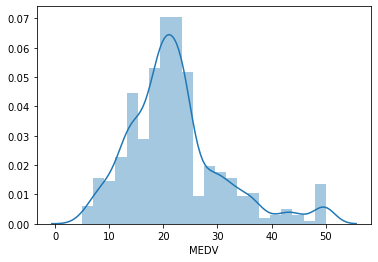

In [12]:
sns.distplot(Chas0);

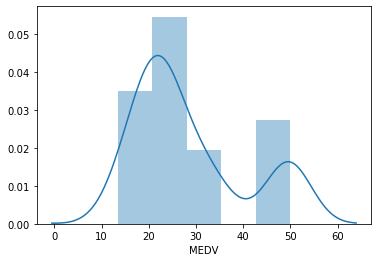

In [13]:
sns.distplot(Chas1);

# Living on the Charles River

![Charles](img/Charles.jpg)

The Charles River is an 80 mile long river that stretches through 23 different towns and cities before meeting the Atlantic Ocean at Boston Harbour(5). The Charles River is a hub of activity and recreation in the Boston area and it is renowned for it's scenic bike rides and rowing regattas. Due to the river's close connection with the city of Boston it would in theory mean that residents would like to live in or around the river for easy access to it's amenities. This theoretical desire to live near the river should result in a direct increase in price driven by this demand. New research carried out in England has actually found a direct link between living in natural enviroments near rivers and lakes and increased happiness in residents(6). This direct link between living near a body of water and happiness would again likely drive up the demand to live near the Charles River. 

A negative feature of living near a river is the risk of flooding which has occurred on the Charles River in the past (16). This would in theory bring down the demand to live near the river and would reduce the house prices in the area. 

In the above graphs there is a broad ranges of house prices that do not live near the Charles River. This might indicate that there are various different factors affecting the house prices in the Boston region. Both graphs appear to have a similar curve indicating similarities between the house prices. Houses on the Charles River minimum value does not drop 15k which would indicate a possible link between the river and median house prices. 

From the heatmap below there is a very small correlation between the CHAS variable and MEDV. It would appear that there is little statistical evidence to link the Charles River having any effect on the Boston house prices. 

I will now use the other two main variables from the heatmap to try and create a neural network to predict the house prices. For the purpose of this network I will not be using the CHAS variable. 



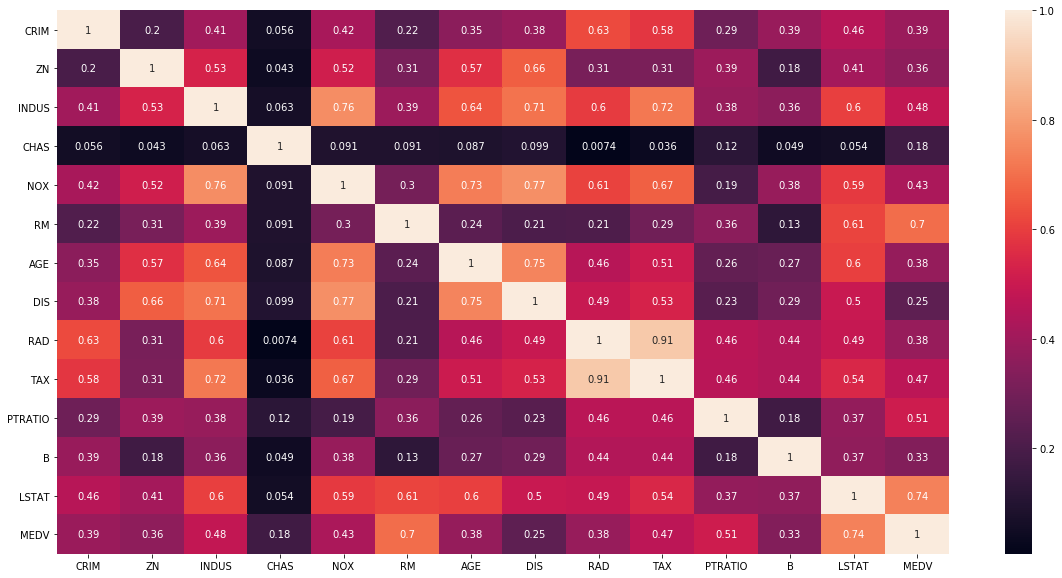

In [14]:

plt.figure(figsize=(20, 10))
sns.heatmap(boston.corr().abs(),  annot=True)

## Observations after Variable Analysis

My original prediction that RM would correlate with MEDV was proven correct according to the heatmap above. It was the highest correlation factor with a score of 0.7. LSTAT(Percentage of Lower Status of Population) was the second highest variable found. This would tie in with the importance of location and MEDV as certin wealthier neighbourhoods would have a lower LSTAT and thus higher MEDV. The demand to live in these more affleunt areas would in theory drive up the price of the houses. 
I will now base my analysis using the two variables RM and LSTAT to try and create a model that would predict house prices. 

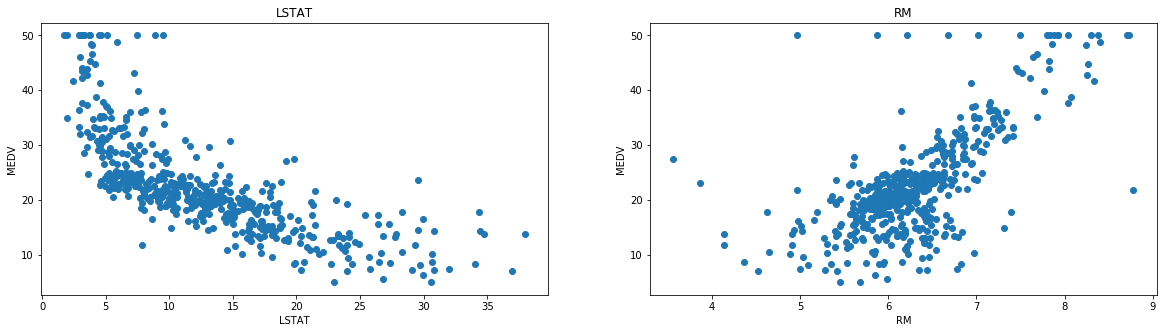

In [15]:

plt.figure(figsize=(20, 5))



features = ['LSTAT', 'RM']

target = boston['MEDV']



for i, col in enumerate(features):

    plt.subplot(1, len(features) , i+1)

    x = boston[col]

    y = target

    plt.scatter(x, y, marker='o')

    plt.title(col)

    plt.xlabel(col)

    plt.ylabel('MEDV')

## Graph Analysis
From these graphs a linear relationship is apparent between MEDV and both RM and LSTAT. The graphs ties in with previous predictions as the more rooms in a property the higher the MEDV and the lower the LSTAT the higher the house price. These graphs mean I am confident of using these variables to train a predictor model. 

## Preparing the data for Neural Network

In [16]:
import keras as kr

import sklearn.preprocessing as pre

# For splitting into training and test sets.
import sklearn.model_selection as mod
# For whitening.
import sklearn.decomposition as dec

Using TensorFlow backend.


In [17]:
# Creating the train and test inputs
x = boston[['RM','LSTAT']]


In [18]:
# Creating the target output
y = boston[['MEDV']]


In [19]:
# Splitting the data into test and train to help with the neural network testing, I have printed out the result below to show they have been evenly distributed.

x_train, x_test, y_train, y_test = mod.train_test_split(x, y, test_size = 0.2, random_state=5)
print(x_train.shape)

print(x_test.shape)

print(y_train.shape)

print(y_test.shape)

(404, 2)
(102, 2)
(404, 1)
(102, 1)


## Creating the Neural Network

In [20]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(20, input_dim=2, activation="tanh"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
m.fit(x_train, y_train, epochs=100, batch_size=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
404/404 [==============================] - 0s 769us/step - loss: 557.5629
Epoch 2/100
404/404 [==============================] - 0s 208us/step - loss: 510.0185
Epoch 3/100
404/404 [==============================] - 0s 218us/step - loss: 460.3679
Epoch 4/100
404/404 [==============================] - 0s 208us/step - loss: 408.8209
Epoch 5/100
404/404 [==============================] - 0s 186us/step - loss: 365.6173
Epoch 6/100
404/404 [==============================] - 0s 215us/step - loss: 331.7835
Epoch 7/100
404/404 [==============================] - 0s 284us/step - loss: 306.2811
Epoch 8/100
404/404 [==============================] - 0s 190us/step - loss: 283.8623
Epoch 9/100
404/404 [==============================] - 0s 205us/step - loss: 263.7220
Epoch 10/100
404/404 [==============================] - 0s 203us/step - loss: 245.1907
Epoch 11/100
404/404 [==============================] - 0s 190us/step - loss: 228.1073
Epoc

404/404 [==============================] - 0s 173us/step - loss: 58.1093
Epoch 93/100
404/404 [==============================] - 0s 188us/step - loss: 57.8901
Epoch 94/100
404/404 [==============================] - 0s 181us/step - loss: 57.6720
Epoch 95/100
404/404 [==============================] - 0s 173us/step - loss: 57.4997
Epoch 96/100
404/404 [==============================] - 0s 176us/step - loss: 57.2583
Epoch 97/100
404/404 [==============================] - 0s 190us/step - loss: 57.0250
Epoch 98/100
404/404 [==============================] - 0s 166us/step - loss: 56.8501
Epoch 99/100
404/404 [==============================] - 0s 168us/step - loss: 56.6568
Epoch 100/100
404/404 [==============================] - 0s 205us/step - loss: 56.3846


In [22]:
# Preparing the input from the trained data
scaler = pre.StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

In [23]:
# Shows what the trained data would predict using the x train data points.
x_train_scaled = scaler.transform(x_train)
m.predict(x_train_scaled).round().T

array([[  9.,  14.,  14.,   2.,  18., -17.,   0.,  -8.,   8.,   4.,  17.,
         15.,  19.,  18.,   2.,  13.,  11.,  -1.,   0.,  15.,   2.,   1.,
         -1.,  10.,  10.,  11.,   3.,  14.,  12.,   8.,  13.,  14.,  19.,
          8.,   5.,   7.,   4.,   5.,   5.,  11.,  -4.,  -0.,  14.,  -2.,
          3.,   2.,  12.,  -0.,  13.,   6.,  19.,  16.,  10.,  11.,   5.,
          3.,   5.,  12.,  19.,   8.,  15.,   7.,  -2.,   9.,   6.,  20.,
          9., -20.,   9.,  14.,   8.,   8.,  21.,  -8.,  -2.,   4.,   9.,
         15.,  10.,  12.,  -1.,   2.,  -6.,   9.,   9.,   5.,  10.,   3.,
          3.,   3.,   6.,  17.,  14.,  17.,   8.,   7.,   7.,   8.,   5.,
         14.,  10.,   4.,  12.,  12.,   6.,  17.,   6.,  20.,   1.,   6.,
         -3.,   7.,   4.,   9.,   6.,   9.,   6.,  -3.,  -3.,  13.,  -1.,
          5.,   3.,  -1.,  14.,   2.,  16.,  13.,   5.,   3.,  16.,   7.,
          8.,   3.,   7.,  10.,  12.,   7.,  16.,  -1.,   8.,  18.,  -3.,
         14.,  10.,   9.,   6.,   6., 

In [24]:
y_test.as_matrix().astype(np.float32)

C:\Users\Tullowhurler\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[37.6],
       [27.9],
       [22.6],
       [13.8],
       [35.2],
       [10.4],
       [23.9],
       [29. ],
       [22.8],
       [23.2],
       [33.2],
       [19. ],
       [20.3],
       [36.1],
       [24.4],
       [17.2],
       [17.9],
       [19.6],
       [19.7],
       [15. ],
       [ 8.1],
       [23. ],
       [44.8],
       [23.1],
       [32.2],
       [10.8],
       [23.1],
       [21.2],
       [22.2],
       [24.1],
       [17.3],
       [ 7. ],
       [12.7],
       [17.8],
       [26.4],
       [19.6],
       [25.1],
       [ 8.3],
       [48.8],
       [34.9],
       [13.8],
       [14.4],
       [30.1],
       [12.7],
       [27.1],
       [24.8],
       [ 7. ],
       [20.5],
       [21.5],
       [14. ],
       [20.4],
       [22.2],
       [21.4],
       [13.5],
       [19.4],
       [24.7],
       [43.8],
       [14.1],
       [28.6],
       [19.7],
       [16.8],
       [23.2],
       [16.2],
       [41.3],
       [22.7],
       [ 8.3],
       [18

In [25]:
y_train.as_matrix().astype(np.float32)

C:\Users\Tullowhurler\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[13.1],
       [50. ],
       [ 8.8],
       [20.6],
       [12.1],
       [50. ],
       [24.1],
       [16.1],
       [23.9],
       [24.3],
       [13.1],
       [30.3],
       [15.2],
       [13.8],
       [26.4],
       [16.6],
       [18.9],
       [17.6],
       [18.7],
       [33.4],
       [20.7],
       [17.1],
       [23.4],
       [26.5],
       [21.4],
       [21.5],
       [19.2],
       [50. ],
       [50. ],
       [23. ],
       [10.5],
       [17.8],
       [10.9],
       [21. ],
       [13.8],
       [10.5],
       [22.2],
       [30.5],
       [19.4],
       [15.6],
       [20.2],
       [19.3],
       [34.6],
       [50. ],
       [24. ],
       [18.7],
       [19.8],
       [22.5],
       [13.3],
       [50. ],
       [11.8],
       [11. ],
       [23.7],
       [35.4],
       [15.2],
       [24.4],
       [33.4],
       [31.6],
       [13.4],
       [34.9],
       [14.4],
       [35.4],
       [25.3],
       [18.3],
       [16.6],
       [13.4],
       [23

In [39]:
# Compares the trained data from input to output
m.evaluate(x_train_scaled, y_train)

404/404 [==============================] - 0s 40us/step


164.53405852365023

In [38]:
scaler = pre.StandardScaler()
scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)

In [28]:
x_test_scaled = scaler.transform(x_test)
m.predict(x_test_scaled).round().T

array([[14.,  3.,  6., 13., 16., 11.,  8.,  9., 11., 13., 13.,  1.,  1.,
        13.,  6.,  4., 11., -3.,  7., -2., 12.,  8., 16.,  7., 12., 14.,
         2.,  7., -0.,  3., 15., 10.,  8., 22.,  7.,  9., 10., 15., 19.,
         4., 11., 14.,  7., 12.,  5.,  8., 11., 11.,  9., 17.,  9.,  6.,
         4., 14.,  5.,  1., 13., 17.,  6.,  6.,  8.,  2.,  7.,  6.,  5.,
         5., 12.,  1.,  1.,  2., 17., -2.,  4., 20., -1.,  4.,  6., 10.,
        18.,  9.,  9., 16., 16., 11., -1., 17.,  2.,  8.,  6., -3., 14.,
         6.,  9., 13.,  2.,  2.,  8.,  8.,  7., -0.,  6.,  7.]],
      dtype=float32)

In [29]:
y_test.as_matrix().astype(np.float32)

C:\Users\Tullowhurler\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[37.6],
       [27.9],
       [22.6],
       [13.8],
       [35.2],
       [10.4],
       [23.9],
       [29. ],
       [22.8],
       [23.2],
       [33.2],
       [19. ],
       [20.3],
       [36.1],
       [24.4],
       [17.2],
       [17.9],
       [19.6],
       [19.7],
       [15. ],
       [ 8.1],
       [23. ],
       [44.8],
       [23.1],
       [32.2],
       [10.8],
       [23.1],
       [21.2],
       [22.2],
       [24.1],
       [17.3],
       [ 7. ],
       [12.7],
       [17.8],
       [26.4],
       [19.6],
       [25.1],
       [ 8.3],
       [48.8],
       [34.9],
       [13.8],
       [14.4],
       [30.1],
       [12.7],
       [27.1],
       [24.8],
       [ 7. ],
       [20.5],
       [21.5],
       [14. ],
       [20.4],
       [22.2],
       [21.4],
       [13.5],
       [19.4],
       [24.7],
       [43.8],
       [14.1],
       [28.6],
       [19.7],
       [16.8],
       [23.2],
       [16.2],
       [41.3],
       [22.7],
       [ 8.3],
       [18

In [30]:
m.evaluate(x_test_scaled, y_test)

102/102 [==============================] - 0s 108us/step


290.7733923220167

This mean squared error is very high so we will whiten the data to see if we can create a more accurate model

## Whitening the data 

In [31]:
pca = dec.PCA(n_components=2, whiten=True)
pca.fit(x_train)
x_train_white = pd.DataFrame(pca.transform(x_train), columns=x.columns)


## Restesting the data

In [32]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(100, input_dim=2, activation="tanh"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")

In [33]:

m.fit(x_train_white, y_train, epochs=100, batch_size=10)

Epoch 1/100
404/404 [==============================] - 0s 866us/step - loss: 584.9535
Epoch 2/100
404/404 [==============================] - 0s 195us/step - loss: 548.4730
Epoch 3/100
404/404 [==============================] - 0s 213us/step - loss: 496.3246
Epoch 4/100
404/404 [==============================] - 0s 181us/step - loss: 424.9127
Epoch 5/100
404/404 [==============================] - 0s 203us/step - loss: 340.4770
Epoch 6/100
404/404 [==============================] - 0s 208us/step - loss: 255.5538
Epoch 7/100
404/404 [==============================] - 0s 210us/step - loss: 181.0637
Epoch 8/100
404/404 [==============================] - 0s 190us/step - loss: 122.3561
Epoch 9/100
404/404 [==============================] - 0s 183us/step - loss: 82.2888
Epoch 10/100
404/404 [==============================] - 0s 208us/step - loss: 58.2233
Epoch 11/100
404/404 [==============================] - 0s 203us/step - loss: 45.6853
Epoch 12/100
404/404 [==============================] -

404/404 [==============================] - 0s 178us/step - loss: 28.7958
Epoch 96/100
404/404 [==============================] - 0s 188us/step - loss: 28.7844
Epoch 97/100
404/404 [==============================] - 0s 166us/step - loss: 28.4074
Epoch 98/100
404/404 [==============================] - 0s 163us/step - loss: 28.2995
Epoch 99/100
404/404 [==============================] - 0s 181us/step - loss: 28.3617
Epoch 100/100
404/404 [==============================] - 0s 171us/step - loss: 28.1147


In [34]:
x_test_white = scaler.transform(x_test)
m.predict(x_test_white).round().T

array([[10., 21., 23., 29., 12., 27., 17., 19., 19., 20., 14., 27., 27.,
        15., 22., 27., 30., 31., 28., 29., 28., 22.,  9., 22., 16., 23.,
        24., 24., 25., 22., 22., 27., 25., 11., 22., 22., 20., 22.,  8.,
        17., 22., 28., 21., 23., 22., 18., 30., 24., 24., 19., 24., 25.,
        24., 21., 27., 24., 11., 17., 20., 26., 25., 27., 27., 18., 25.,
        29., 20., 26., 27., 27., 18., 27., 28., 14., 30., 20., 26., 26.,
        14., 24., 23.,  9., 20., 22., 29., 18., 29., 29., 26., 29., 11.,
        26., 23., 21., 24., 22., 26., 18., 26., 30., 24., 22.]],
      dtype=float32)

In [35]:

y_test.as_matrix().astype(np.float32)

C:\Users\Tullowhurler\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[37.6],
       [27.9],
       [22.6],
       [13.8],
       [35.2],
       [10.4],
       [23.9],
       [29. ],
       [22.8],
       [23.2],
       [33.2],
       [19. ],
       [20.3],
       [36.1],
       [24.4],
       [17.2],
       [17.9],
       [19.6],
       [19.7],
       [15. ],
       [ 8.1],
       [23. ],
       [44.8],
       [23.1],
       [32.2],
       [10.8],
       [23.1],
       [21.2],
       [22.2],
       [24.1],
       [17.3],
       [ 7. ],
       [12.7],
       [17.8],
       [26.4],
       [19.6],
       [25.1],
       [ 8.3],
       [48.8],
       [34.9],
       [13.8],
       [14.4],
       [30.1],
       [12.7],
       [27.1],
       [24.8],
       [ 7. ],
       [20.5],
       [21.5],
       [14. ],
       [20.4],
       [22.2],
       [21.4],
       [13.5],
       [19.4],
       [24.7],
       [43.8],
       [14.1],
       [28.6],
       [19.7],
       [16.8],
       [23.2],
       [16.2],
       [41.3],
       [22.7],
       [ 8.3],
       [18

In [40]:
m.evaluate(x_test_white, y_test)

102/102 [==============================] - 0s 78us/step


174.94613093955843

The mean squared error has dropped a lot but is still significantly high. It appears from the results that the model is undervaluing the inputs. 

## Summary 

The neural network does not appear to accurately predict the output using the variables we provided. The variables used RM and LSTAT were chosen after the correlation test was run on the dataset and it was found the correlated best with MEDV. Whitening the data reduced the mean squared error but still was a significant number. The modeal apears to undervalue the houses and may require more inputs or variables to be a more accurate model.   

## References
1. www.hdip-data-analytics.com/_media/resources/pdf/s4/hedonic_housing_prices_and_the_demand_for_clean_air1_.pdf  
2. https://www.kaggle.com/prasadperera/the-boston-housing-dataset 
3. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
4. https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef 
5. https://en.wikipedia.org/wiki/Charles_River
6. https://www.sciencedirect.com/science/article/abs/pii/S0959378013000575
7. https://www.dollartimes.com/inflation/inflation.php?amount=10000&year=1978
8. https://www.zillow.com/home-values/ 
9. https://www.theguardian.com/uk/2004/mar/05/health.drugsandalcohol
10. https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/dogs.ipynb
11. https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-and-iris.ipynb
12. https://resources.point.com/8-biggest-factors-affect-real-estate-prices/
13. https://olegleyz.github.io/boston_housing.html
14. https://en.wikipedia.org/wiki/Mean_squared_error 
15. https://keras.io/metrics/ 
16. https://pubs.usgs.gov/gip/2007/47/pdf/gip-47.pdf
17. https://sciencing.com/negative-tvalue-mean-6921215.html